In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the model
model = YOLO('../models/YOLOv8nNORO.pt')  # Adjust path as needed

# Load and predict using an image
results = model('../examples/IMG_9189.png')  # Adjust path as needed


image 1/1 /Users/yiwengao/src/vision2024/src/../examples/IMG_9189.png: 640x480 1 note, 381.8ms
Speed: 63.4ms preprocess, 381.8ms inference, 27.7ms postprocess per image at shape (1, 3, 640, 480)


In [5]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'robot', 1: 'note'}
 obb: None
 orig_img: array([[[112, 150, 158],
         [108, 147, 156],
         [103, 145, 155],
         ...,
         [112,  98,  62],
         [103,  89,  53],
         [111,  97,  61]],
 
        [[100, 138, 146],
         [ 99, 138, 147],
         [ 95, 137, 147],
         ...,
         [111,  96,  60],
         [108,  93,  57],
         [102,  87,  51]],
 
        [[ 83, 121, 129],
         [ 85, 124, 133],
         [ 85, 127, 137],
         ...,
         [106,  91,  55],
         [105,  90,  54],
         [102,  87,  51]],
 
        ...,
 
        [[137, 142, 144],
         [125, 130, 133],
         [130, 135, 140],
         ...,
         [153, 156, 163],
         [164, 167, 174],
         [173, 176, 183]],
 
        [[132, 136, 138],
         [131, 135, 137],
         [124, 129, 132],
         ...,
        

In [6]:
len(results)

1

In [7]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.9446])
data: tensor([[1.1393e+03, 1.9110e+03, 2.1201e+03, 2.5695e+03, 9.4461e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (4032, 3024)
shape: torch.Size([1, 6])
xywh: tensor([[1629.7280, 2240.2332,  980.8314,  658.5465]])
xywhn: tensor([[0.5389, 0.5556, 0.3243, 0.1633]])
xyxy: tensor([[1139.3124, 1910.9598, 2120.1438, 2569.5063]])
xyxyn: tensor([[0.3768, 0.4739, 0.7011, 0.6373]])

1139 1910 2120 2569


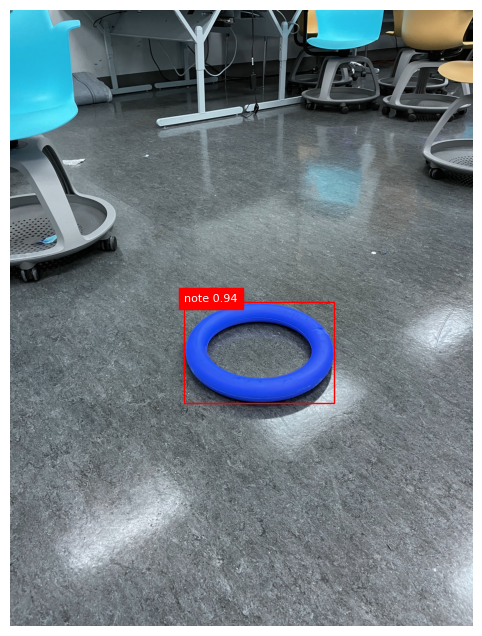

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(results[0].orig_img)

for res in results:
    for box in res.boxes:
    # Unpack bounding box coordinates
        xmin, ymin, xmax, ymax = map(int, box.xyxy.squeeze())
        print(xmin, ymin, xmax, ymax)
        label = res.names[int(box.cls)]  # Get the class name using the detected class index
        confidence = float(box.conf)  # Confidence score

        # Create a Rectangle patch
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add label and confidence
        ax.text(xmin, ymin, f'{label} {confidence:.2f}', color='white', fontsize=8, backgroundcolor='red')


plt.axis('off')  # Turn off axis
plt.show()  # Display the image